In [2]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import pearsonr

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import time
import itertools


In [3]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [4]:
!pip install yellowbrick

In [5]:
from yellowbrick.classifier import ConfusionMatrix

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



### Cleaning Data

In [6]:
adult_income = pd.read_csv('/Users/flatironschool/Downloads/adult.data', header=None)
adult_income

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Adding Column Labels

In [7]:
# age: continuous.
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
# fnlwgt: continuous; fnlwgt represents final weight, which is the number of units in the target population that 
#         the responding unit represents. 
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters,
# .          1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# education_num: continuous.
# marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, 
#                 Married-AF-spouse.
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, 
#             Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, 
#             Armed-Forces.
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# sex: Female, Male.
# capital_gain: continuous.
# capital_loss: continuous.
# hours_per_week: continuous.
# native_country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, 
#                 Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, 
#                 Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, 
#                 Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, 
#                 Hong, Holand-Netherlands.
adult_income.columns = ['Age', 'Work_Class', 'Final_Weight', 'Education', 'Education_Num', 'Marital_Status',
                        'Occupation','Relationship', 'Race',  'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week',
                        'Native_Country', 'Income']

In [8]:
adult_income.head()

,Age,Work_Class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
print(adult_income.shape)
adult_income.describe()

(32561, 15)


,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
adult_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Work_Class        32561 non-null object
Final_Weight      32561 non-null int64
Education         32561 non-null object
Education_Num     32561 non-null int64
Marital_Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital_Gain      32561 non-null int64
Capital_Loss      32561 non-null int64
Hours_Per_Week    32561 non-null int64
Native_Country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
# Checking for NA values
adult_income.isna().sum()

Age               0
Work_Class        0
Final_Weight      0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income            0
dtype: int64

In [12]:
# Unique values:
for col in adult_income.columns:
    try:
        print(col, adult_income[col].value_counts()[:5])
    except:
        print(col, adult_income[col].value_counts())
    print('\n') # Break up the output between columns

Age 36    898
31    888
34    886
23    877
35    876
Name: Age, dtype: int64


Work_Class  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
Name: Work_Class, dtype: int64


Final_Weight 164190    13
203488    13
123011    13
113364    12
121124    12
Name: Final_Weight, dtype: int64


Education  HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
Name: Education, dtype: int64


Education_Num 9     10501
10     7291
13     5355
14     1723
11     1382
Name: Education_Num, dtype: int64


Marital_Status  Married-civ-spouse    14976
 Never-married         10683
 Divorced               4443
 Separated              1025
 Widowed                 993
Name: Marital_Status, dtype: int64


Occupation  Prof-specialty     4140
 Craft-repair       4099
 Exec-managerial    4066
 Adm-clerical       3770
 Sales              3650
Name: Occupation, dtype: int

In [13]:
adult_income.head(5)

,Age,Work_Class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
condensed_adult = adult_income
condensed_adult

,Age,Work_Class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
# Dropping columns I will not use.
# Since I have to make dummy variables in any case, I kept the column "education" and dropped "Education_Num" because
# the "Education" retains more information.

condensed_adult = condensed_adult.drop(['Final_Weight', 'Education_Num', 'Relationship', 'Native_Country'], axis= 1)

In [16]:
condensed_adult.head()

,Age,Work_Class,Education,Marital_Status,Occupation,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,0,0,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,<=50K


Normalizing numerical values prior to adding dummy variables

In [17]:
condensed_normalized = condensed_adult
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['Age', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week']:
    condensed_normalized[feat] = norm_feat(condensed_normalized[feat])
condensed_normalized[feat].describe()

count    3.256100e+04
mean    -1.361809e-15
std      1.000000e+00
min     -3.193981e+00
25%     -3.542890e-02
50%     -3.542890e-02
75%      3.695137e-01
max      4.742894e+00
Name: Hours_Per_Week, dtype: float64

In [23]:
condensed_normalized.head()

,Age,Work_Class,Education,Marital_Status,Occupation,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Income
0,0.030670,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,0.148451,-0.216656,-0.035429,<=50K
1,0.837096,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,-0.145918,-0.216656,-2.222119,<=50K
2,-0.042641,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,-0.145918,-0.216656,-0.035429,<=50K
3,1.057031,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,-0.145918,-0.216656,-0.035429,<=50K
4,-0.775756,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,-0.145918,-0.216656,-0.035429,<=50K


In [24]:
condensed_normalized.columns

Index(['Age', 'Work_Class', 'Education', 'Marital_Status', 'Occupation',
       'Race', 'Sex', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week',
       'Income'],
      dtype='object')

Creating Dummy Variables for Categorical Data

In [25]:
dummies_normalized = pd.get_dummies(condensed_normalized)

In [26]:
non_normal_dummies = pd.get_dummies(adult_income)
non_normal_dummies.head()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,Work_Class_ ?,Work_Class_ Federal-gov,Work_Class_ Local-gov,Work_Class_ Never-worked,...,Native_Country_ Scotland,Native_Country_ South,Native_Country_ Taiwan,Native_Country_ Thailand,Native_Country_ Trinadad&Tobago,Native_Country_ United-States,Native_Country_ Vietnam,Native_Country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
non_normal_dummies.shape

(32561, 110)

### Exploratory Data Analysis

In [28]:
counts = non_normal_dummies['Income_ >50K'].value_counts()

# under_50 = counts[0]
# over_50 = counts[1]
# income = [under_50,over_50]
counts

0    24720
1     7841
Name: Income_ >50K, dtype: int64

In [29]:
counts = non_normal_dummies['Income_ >50K']

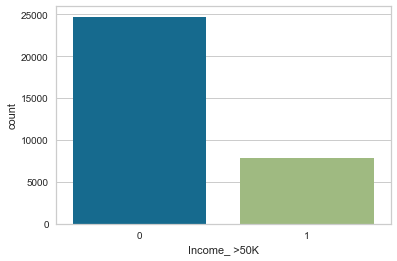

In [30]:
sns.countplot(counts)

In [32]:
non_normal_dummies.columns[31:38]

Index(['Marital_Status_ Divorced', 'Marital_Status_ Married-AF-spouse',
       'Marital_Status_ Married-civ-spouse',
       'Marital_Status_ Married-spouse-absent',
       'Marital_Status_ Never-married', 'Marital_Status_ Separated',
       'Marital_Status_ Widowed'],
      dtype='object')

In [33]:
marital_status = non_normal_dummies.iloc[:, 31:38]
marital_status


,Marital_Status_ Divorced,Marital_Status_ Married-AF-spouse,Marital_Status_ Married-civ-spouse,Marital_Status_ Married-spouse-absent,Marital_Status_ Never-married,Marital_Status_ Separated,Marital_Status_ Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0
32557,0,0,1,0,0,0,0
32558,0,0,0,0,0,0,1
32559,0,0,0,0,1,0,0


In [ ]:
# ax4 = fig.add_subplot(222)
# ax4.hist(non_normal_dummies['Income_ >50K'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
# ax4.set_xlabel('Income over/under 50K',fontsize = 15)
# ax4.set_ylabel('# Counts',fontsize = 15)
# ax4.set_title('Income',fontsize = 15)

In [34]:
non_normal_dummies.groupby('Income_ >50K').mean()

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week,Work_Class_ ?,Work_Class_ Federal-gov,Work_Class_ Local-gov,Work_Class_ Never-worked,...,Native_Country_ Puerto-Rico,Native_Country_ Scotland,Native_Country_ South,Native_Country_ Taiwan,Native_Country_ Thailand,Native_Country_ Trinadad&Tobago,Native_Country_ United-States,Native_Country_ Vietnam,Native_Country_ Yugoslavia,Income_ <=50K
Income_ >50K,,,,,,,,,,,,,,,,,,,,,
0,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210,0.066545,0.023827,0.059709,0.000283,...,0.004126,0.000364,0.002589,0.001254,0.000607,0.000688,0.889927,0.002508,0.000405,1.0
1,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026,0.024359,0.047315,0.078689,0.000000,...,0.001530,0.000383,0.002041,0.002551,0.000383,0.000255,0.914552,0.000638,0.000765,0.0


People earning more than 50 K per year are on the whole older, more highly educated, work more, and have greater capital gains and losses than people who earn less than or equal to 50 k per year.

In [35]:
dummies_normalized.groupby('Income_ >50K').mean()

,Age,Capital_Gain,Capital_Loss,Hours_Per_Week,Work_Class_ ?,Work_Class_ Federal-gov,Work_Class_ Local-gov,Work_Class_ Never-worked,Work_Class_ Private,Work_Class_ Self-emp-inc,...,Occupation_ Tech-support,Occupation_ Transport-moving,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Income_ <=50K
Income_ >50K,,,,,,,,,,,,,,,,,,,,,
0,-0.131807,-0.125777,-0.084775,-0.129359,0.066545,0.023827,0.059709,0.000283,0.717354,0.019984,...,0.026092,0.051659,0.011125,0.030866,0.110720,0.009951,0.837338,0.388026,0.611974,1.0
1,0.415544,0.396531,0.267266,0.407823,0.024359,0.047315,0.078689,0.000000,0.632955,0.079327,...,0.036092,0.040811,0.004591,0.035200,0.049356,0.003188,0.907665,0.150363,0.849637,0.0


In [36]:
dummies_normalized.head()

,Age,Capital_Gain,Capital_Loss,Hours_Per_Week,Work_Class_ ?,Work_Class_ Federal-gov,Work_Class_ Local-gov,Work_Class_ Never-worked,Work_Class_ Private,Work_Class_ Self-emp-inc,...,Occupation_ Transport-moving,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Income_ <=50K,Income_ >50K
0,0.030670,0.148451,-0.216656,-0.035429,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0.837096,-0.145918,-0.216656,-2.222119,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,-0.042641,-0.145918,-0.216656,-0.035429,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0
3,1.057031,-0.145918,-0.216656,-0.035429,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
4,-0.775756,-0.145918,-0.216656,-0.035429,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [37]:
dummies_normalized.describe()

,Age,Capital_Gain,Capital_Loss,Hours_Per_Week,Work_Class_ ?,Work_Class_ Federal-gov,Work_Class_ Local-gov,Work_Class_ Never-worked,Work_Class_ Private,Work_Class_ Self-emp-inc,...,Occupation_ Transport-moving,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male,Income_ <=50K,Income_ >50K
count,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,-2.549411e-17,1.265595e-15,3.655696e-16,-1.361809e-15,0.056386,0.029483,0.064279,0.000215,0.697030,0.034274,...,0.049046,0.009551,0.031909,0.095943,0.008323,0.854274,0.330795,0.669205,0.759190,0.240810
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.230670,0.169159,0.245254,0.014661,0.459549,0.181935,...,0.215968,0.097264,0.175761,0.294518,0.090851,0.352837,0.470506,0.470506,0.427581,0.427581
min,-1.582182e+00,-1.459182e-01,-2.166562e-01,-3.193981e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.757560e-01,-1.459182e-01,-2.166562e-01,-3.542890e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.159528e-01,-1.459182e-01,-2.166562e-01,-3.542890e-02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,6.904732e-01,-1.459182e-01,-2.166562e-01,3.695137e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,3.769554e+00,1.339437e+01,1.059334e+01,4.742894e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
dummies_normalized.columns

Index(['Age', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week',
       'Work_Class_ ?', 'Work_Class_ Federal-gov', 'Work_Class_ Local-gov',
       'Work_Class_ Never-worked', 'Work_Class_ Private',
       'Work_Class_ Self-emp-inc', 'Work_Class_ Self-emp-not-inc',
       'Work_Class_ State-gov', 'Work_Class_ Without-pay', 'Education_ 10th',
       'Education_ 11th', 'Education_ 12th', 'Education_ 1st-4th',
       'Education_ 5th-6th', 'Education_ 7th-8th', 'Education_ 9th',
       'Education_ Assoc-acdm', 'Education_ Assoc-voc', 'Education_ Bachelors',
       'Education_ Doctorate', 'Education_ HS-grad', 'Education_ Masters',
       'Education_ Preschool', 'Education_ Prof-school',
       'Education_ Some-college', 'Marital_Status_ Divorced',
       'Marital_Status_ Married-AF-spouse',
       'Marital_Status_ Married-civ-spouse',
       'Marital_Status_ Married-spouse-absent',
       'Marital_Status_ Never-married', 'Marital_Status_ Separated',
       'Marital_Status_ Widowed', 'Occupa

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1283a9650>,
      dtype=object)

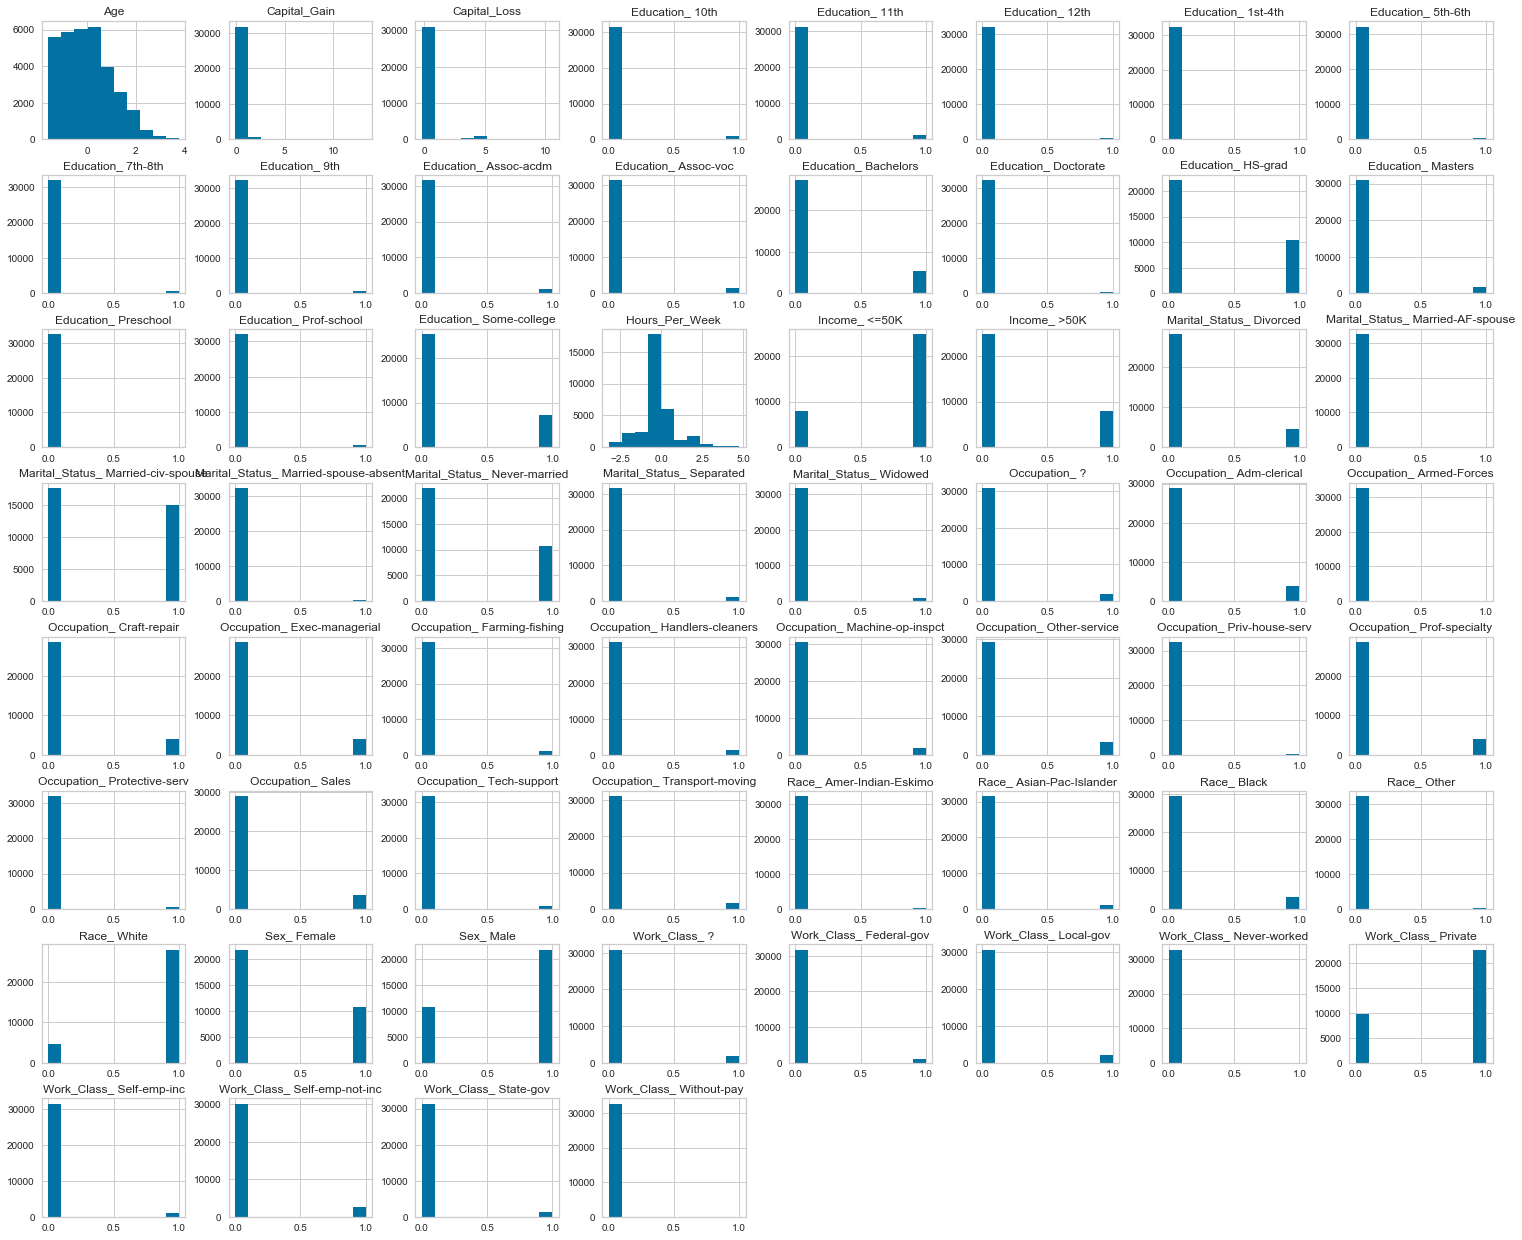

In [39]:
dummies_normalized.hist(figsize = (26, 22))

Capital gains by Income

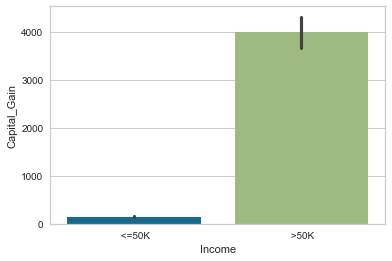

In [40]:
ax = sns.barplot(x= 'Income', y= 'Capital_Gain', data = adult_income)

Capital Losses by Income

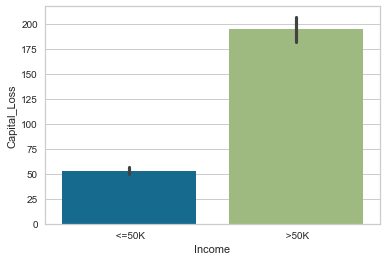

In [41]:
ax = sns.barplot(x= 'Income', y= 'Capital_Loss', data = adult_income)

People earning over 50K annually will have significantly greater capital gaines and losses. Capital investments regardless of whether the investment results in a gain or a loss, indicates that there are resources one can invest; consequently people who earn more will have more to invest.

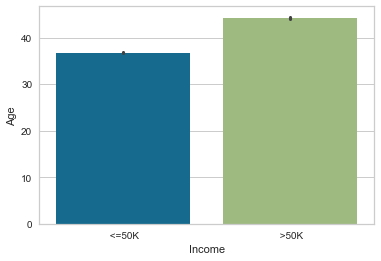

In [42]:
ax = sns.barplot(x= 'Income', y= 'Age', data = adult_income)

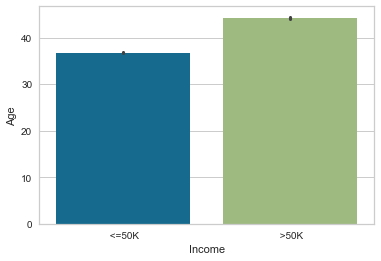

In [43]:
ax = sns.barplot(x= 'Income', y= 'Age', data = adult_income)

In [44]:
# selecting out potential features to examine correlations
features = ['Age', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week',
       'Work_Class_ ?', 'Work_Class_ Federal-gov', 'Work_Class_ Local-gov',
       'Work_Class_ Never-worked', 'Work_Class_ Private',
       'Work_Class_ Self-emp-inc', 'Work_Class_ Self-emp-not-inc',
       'Work_Class_ State-gov', 'Work_Class_ Without-pay', 'Education_ 10th',
       'Education_ 11th', 'Education_ 12th', 'Education_ 1st-4th',
       'Education_ 5th-6th', 'Education_ 7th-8th', 'Education_ 9th',
       'Education_ Assoc-acdm', 'Education_ Assoc-voc', 'Education_ Bachelors',
       'Education_ Doctorate', 'Education_ HS-grad', 'Education_ Masters',
       'Education_ Preschool', 'Education_ Prof-school',
       'Education_ Some-college', 'Marital_Status_ Divorced',
       'Marital_Status_ Married-AF-spouse',
       'Marital_Status_ Married-civ-spouse',
       'Marital_Status_ Married-spouse-absent',
       'Marital_Status_ Never-married', 'Marital_Status_ Separated',
       'Marital_Status_ Widowed', 'Occupation_ ?', 'Occupation_ Adm-clerical',
       'Occupation_ Armed-Forces', 'Occupation_ Craft-repair',
       'Occupation_ Exec-managerial', 'Occupation_ Farming-fishing',
       'Occupation_ Handlers-cleaners', 'Occupation_ Machine-op-inspct',
       'Occupation_ Other-service', 'Occupation_ Priv-house-serv',
       'Occupation_ Prof-specialty', 'Occupation_ Protective-serv',
       'Occupation_ Sales', 'Occupation_ Tech-support',
       'Occupation_ Transport-moving', 'Race_ Amer-Indian-Eskimo',
       'Race_ Asian-Pac-Islander', 'Race_ Black', 'Race_ Other', 'Race_ White',
       'Sex_ Female', 'Sex_ Male', 'Income_ <=50K', 'Income_ >50K']

In [20]:
correlation = adult_income.corr()
correlation

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Final_Weight,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education_Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital_Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital_Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hours_Per_Week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


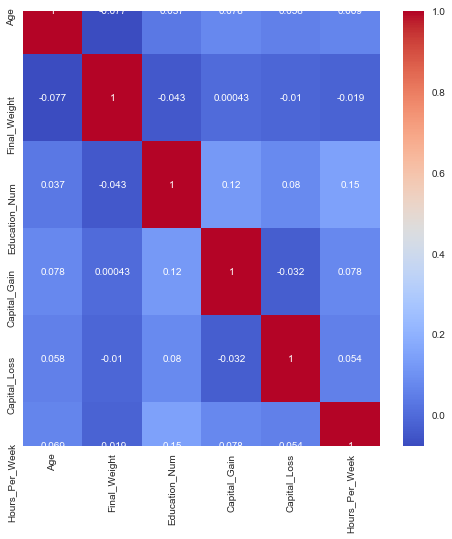

In [46]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, annot =True, cmap = "coolwarm", linecolor="white")

### Initial Modeling

First Attempted Model:  Random Forest


In [47]:
dummies_normalized.columns

Index(['Age', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week',
       'Work_Class_ ?', 'Work_Class_ Federal-gov', 'Work_Class_ Local-gov',
       'Work_Class_ Never-worked', 'Work_Class_ Private',
       'Work_Class_ Self-emp-inc', 'Work_Class_ Self-emp-not-inc',
       'Work_Class_ State-gov', 'Work_Class_ Without-pay', 'Education_ 10th',
       'Education_ 11th', 'Education_ 12th', 'Education_ 1st-4th',
       'Education_ 5th-6th', 'Education_ 7th-8th', 'Education_ 9th',
       'Education_ Assoc-acdm', 'Education_ Assoc-voc', 'Education_ Bachelors',
       'Education_ Doctorate', 'Education_ HS-grad', 'Education_ Masters',
       'Education_ Preschool', 'Education_ Prof-school',
       'Education_ Some-college', 'Marital_Status_ Divorced',
       'Marital_Status_ Married-AF-spouse',
       'Marital_Status_ Married-civ-spouse',
       'Marital_Status_ Married-spouse-absent',
       'Marital_Status_ Never-married', 'Marital_Status_ Separated',
       'Marital_Status_ Widowed', 'Occupa

In [48]:
# ['Age', 'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week',
#        'Work_Class_ ?', 'Work_Class_ Federal-gov', 'Work_Class_ Local-gov',
#        'Work_Class_ Never-worked', 'Work_Class_ Private',
#        'Work_Class_ Self-emp-inc', 'Work_Class_ Self-emp-not-inc',
#        'Work_Class_ State-gov', 'Work_Class_ Without-pay', 'Education_ 10th',
#        'Education_ 11th', 'Education_ 12th', 'Education_ 1st-4th',
#        'Education_ 5th-6th', 'Education_ 7th-8th', 'Education_ 9th',
#        'Education_ Assoc-acdm', 'Education_ Assoc-voc', 'Education_ Bachelors',
#        'Education_ Doctorate', 'Education_ HS-grad', 'Education_ Masters',
#        'Education_ Preschool', 'Education_ Prof-school',
#        'Education_ Some-college', 'Marital_Status_ Divorced',
#        'Marital_Status_ Married-AF-spouse',
#        'Marital_Status_ Married-civ-spouse',
#        'Marital_Status_ Married-spouse-absent',
#        'Marital_Status_ Never-married', 'Marital_Status_ Separated',
#        'Marital_Status_ Widowed', 'Occupation_ ?', 'Occupation_ Adm-clerical',
#        'Occupation_ Armed-Forces', 'Occupation_ Craft-repair',
#        'Occupation_ Exec-managerial', 'Occupation_ Farming-fishing',
#        'Occupation_ Handlers-cleaners', 'Occupation_ Machine-op-inspct',
#        'Occupation_ Other-service', 'Occupation_ Priv-house-serv',
#        'Occupation_ Prof-specialty', 'Occupation_ Protective-serv',
#        'Occupation_ Sales', 'Occupation_ Tech-support',
#        'Occupation_ Transport-moving', 'Race_ Amer-Indian-Eskimo',
#        'Race_ Asian-Pac-Islander', 'Race_ Black', 'Race_ Other', 'Race_ White',
#        'Sex_ Female', 'Sex_ Male', 'Income_ <=50K', 'Income_ >50K']

In [49]:
features = ['Age', 'Capital_Gain', 'Hours_Per_Week',
       'Work_Class_ ?', 'Work_Class_ Federal-gov', 'Work_Class_ Local-gov',
       'Work_Class_ Never-worked', 'Work_Class_ Private',
       'Work_Class_ Self-emp-inc', 'Work_Class_ Self-emp-not-inc',
       'Work_Class_ State-gov', 'Work_Class_ Without-pay', 'Education_ 10th',
       'Education_ 11th', 'Education_ 12th', 'Education_ 1st-4th',
       'Education_ 5th-6th', 'Education_ 7th-8th', 'Education_ 9th',
       'Education_ Assoc-acdm', 'Education_ Assoc-voc', 'Education_ Bachelors',
       'Education_ Doctorate', 'Education_ HS-grad', 'Education_ Masters',
       'Education_ Preschool', 'Education_ Prof-school',
       'Education_ Some-college', 'Marital_Status_ Divorced',
       'Marital_Status_ Married-AF-spouse',
       'Marital_Status_ Married-civ-spouse',
       'Marital_Status_ Married-spouse-absent',
       'Marital_Status_ Never-married', 'Marital_Status_ Separated',
       'Marital_Status_ Widowed', 'Occupation_ ?', 'Occupation_ Adm-clerical',
       'Occupation_ Armed-Forces', 'Occupation_ Craft-repair',
       'Occupation_ Exec-managerial', 'Occupation_ Farming-fishing',
       'Occupation_ Handlers-cleaners', 'Occupation_ Machine-op-inspct',
       'Occupation_ Other-service', 'Occupation_ Priv-house-serv',
       'Occupation_ Prof-specialty', 'Occupation_ Protective-serv',
       'Occupation_ Sales', 'Occupation_ Tech-support',
       'Occupation_ Transport-moving', 'Race_ Amer-Indian-Eskimo',
       'Race_ Asian-Pac-Islander', 'Race_ Black', 'Race_ Other', 'Race_ White',
       'Sex_ Female', 'Sex_ Male']

target = 'Income_ >50K'
x= dummies_normalized[features]
y= dummies_normalized[target]

In [50]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [51]:
data_train, data_test, target_train, target_test = train_test_split(x, y, 
                                                                    test_size = 0.25, random_state=123)


In [52]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [53]:
 from imblearn.over_sampling import SMOTE
>>> X_resampled, y_resampled = SMOTE().fit_resample(X, y)

Using TensorFlow backend.


NameError: name 'X' is not defined

In [54]:
# predictions
for_1 = forest.predict(data_test)
for_1

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [55]:
# Training Accuracy
forest.score(data_train, target_train)

0.8272317772317772

In [56]:
# Test Accuracy
forest.score(data_test, target_test)

0.8277852843631004

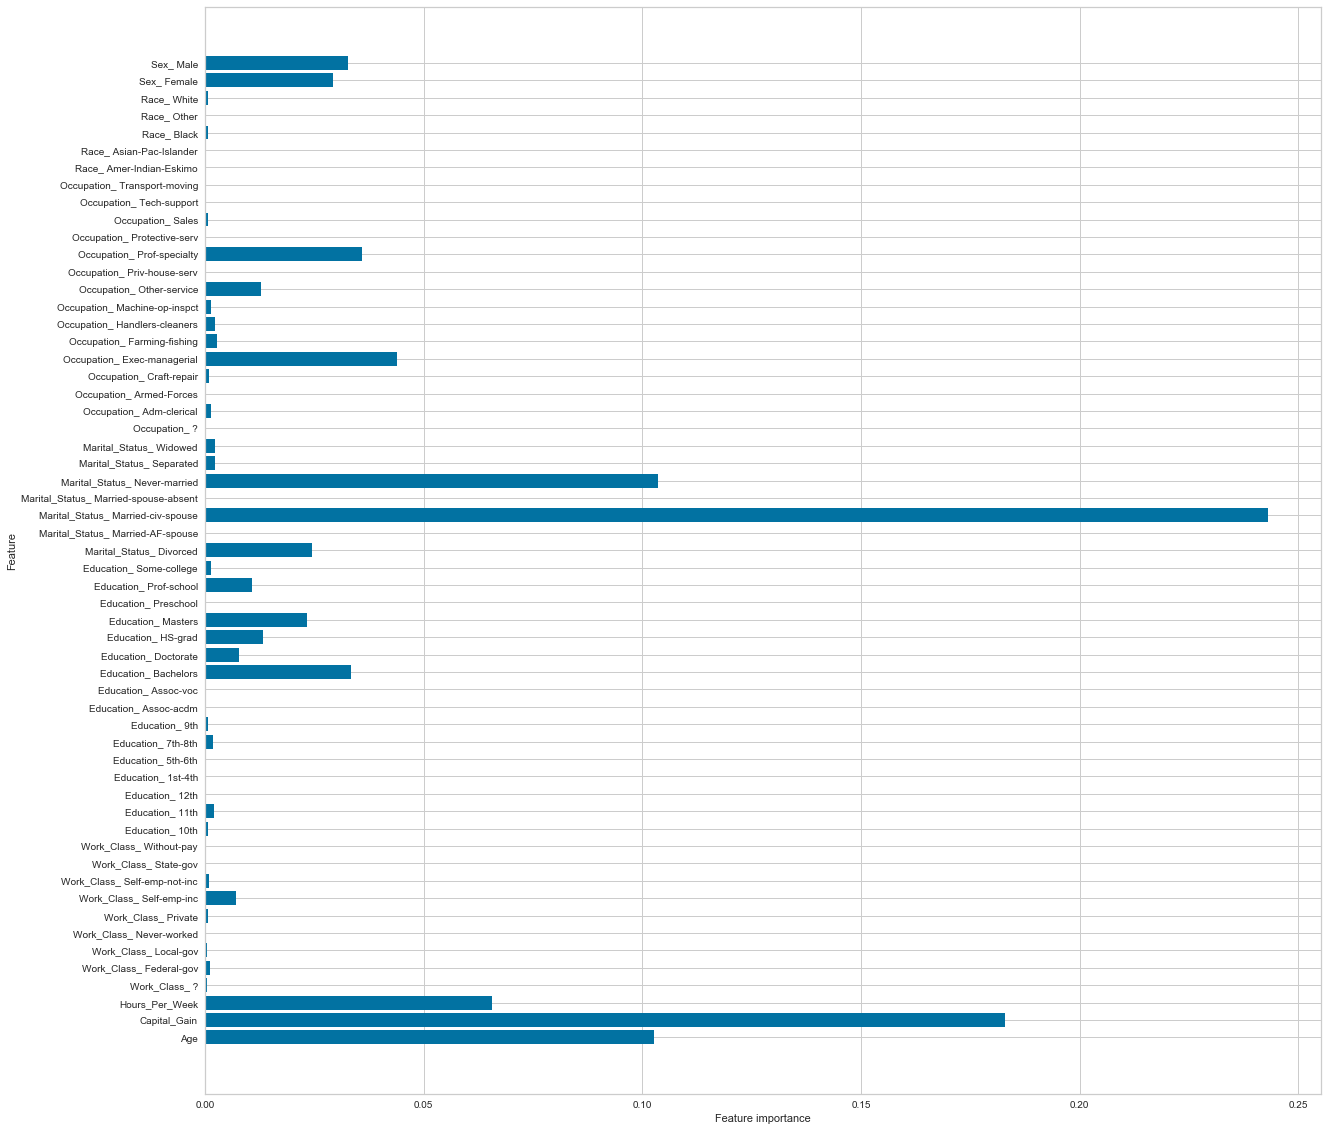

In [57]:
plot_feature_importances(forest)

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
cm = confusion_matrix(target_test,for_1)
classes = ['>50K', '<=50K']

In [65]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

NameError: name 'x_resampled' is not defined

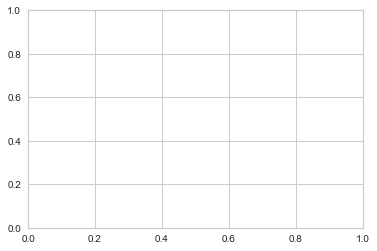

In [66]:
cm = ConfusionMatrix(forest)
cm.fit(x_resampled, y_resampled)
cm.score(data_test, target_test)
cm.show()

Confusion Matrix, without normalization
ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x14b53f1d0>,
                classes=None,
                cmap=<matplotlib.colors.ListedColormap object at 0x14bbb63d0>,
                encoder=None, fontsize=None, force_model=False,
                is_fitted='auto', model=None, percent=False,
                sample_weight=None)


TypeError: Image data of dtype object cannot be converted to float

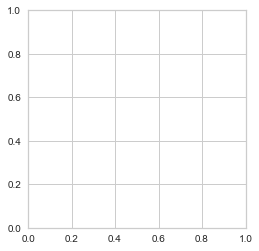

In [62]:
plot_confusion_matrix(cm, classes)

In [66]:
print(classification_report(target_test, for_1)) 

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      6165
           1       0.90      0.34      0.49      1976

    accuracy                           0.83      8141
   macro avg       0.86      0.66      0.69      8141
weighted avg       0.84      0.83      0.80      8141



The Model shows an imbalance with a comparatively large number of false negatives(1336). Utilize imblearn to resample with synthetic data

In [46]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [47]:
import imblearn

Using TensorFlow backend.


In [54]:
from imblearn.over_sampling import SMOTE

In [67]:
x_resampled, y_resampled = SMOTE().fit_resample(data_train, target_train)

In [68]:
from collections import Counter

In [69]:
print(sorted(Counter(y_resampled).items()))

[(0, 18555), (1, 18555)]


Running random forest model again with resampled data:

In [70]:
# data_train, data_test, target_train, target_test = train_test_split(x, y, 
#                                                                     test_size = 0.25, random_state=123)
# forest = RandomForestClassifier(n_estimators=100, max_depth= 5)

# forest.fit(data_train, target_train)

# predictions
# for_1 = forest.predict(data_test)
# for_1

# Training Accuracy
# forest.score(data_train, target_train)

# Test Accuracy
# forest.score(data_test, target_test)

#feature importance
# plot_feature_importances(forest)

In [71]:
forest.fit(x_resampled, y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
#predictions
pred_2 = forest.predict(data_test)

In [73]:
# Training accuracy
forest.score(x_resampled, y_resampled)

0.8019401778496362

In [74]:
# Test Accuracy
forest.score(data_test, target_test)

0.7497850386930353

In [75]:
print(classification_report(target_test, pred_2)) 

              precision    recall  f1-score   support

           0       0.95      0.71      0.81      6165
           1       0.49      0.88      0.63      1976

    accuracy                           0.75      8141
   macro avg       0.72      0.79      0.72      8141
weighted avg       0.84      0.75      0.77      8141



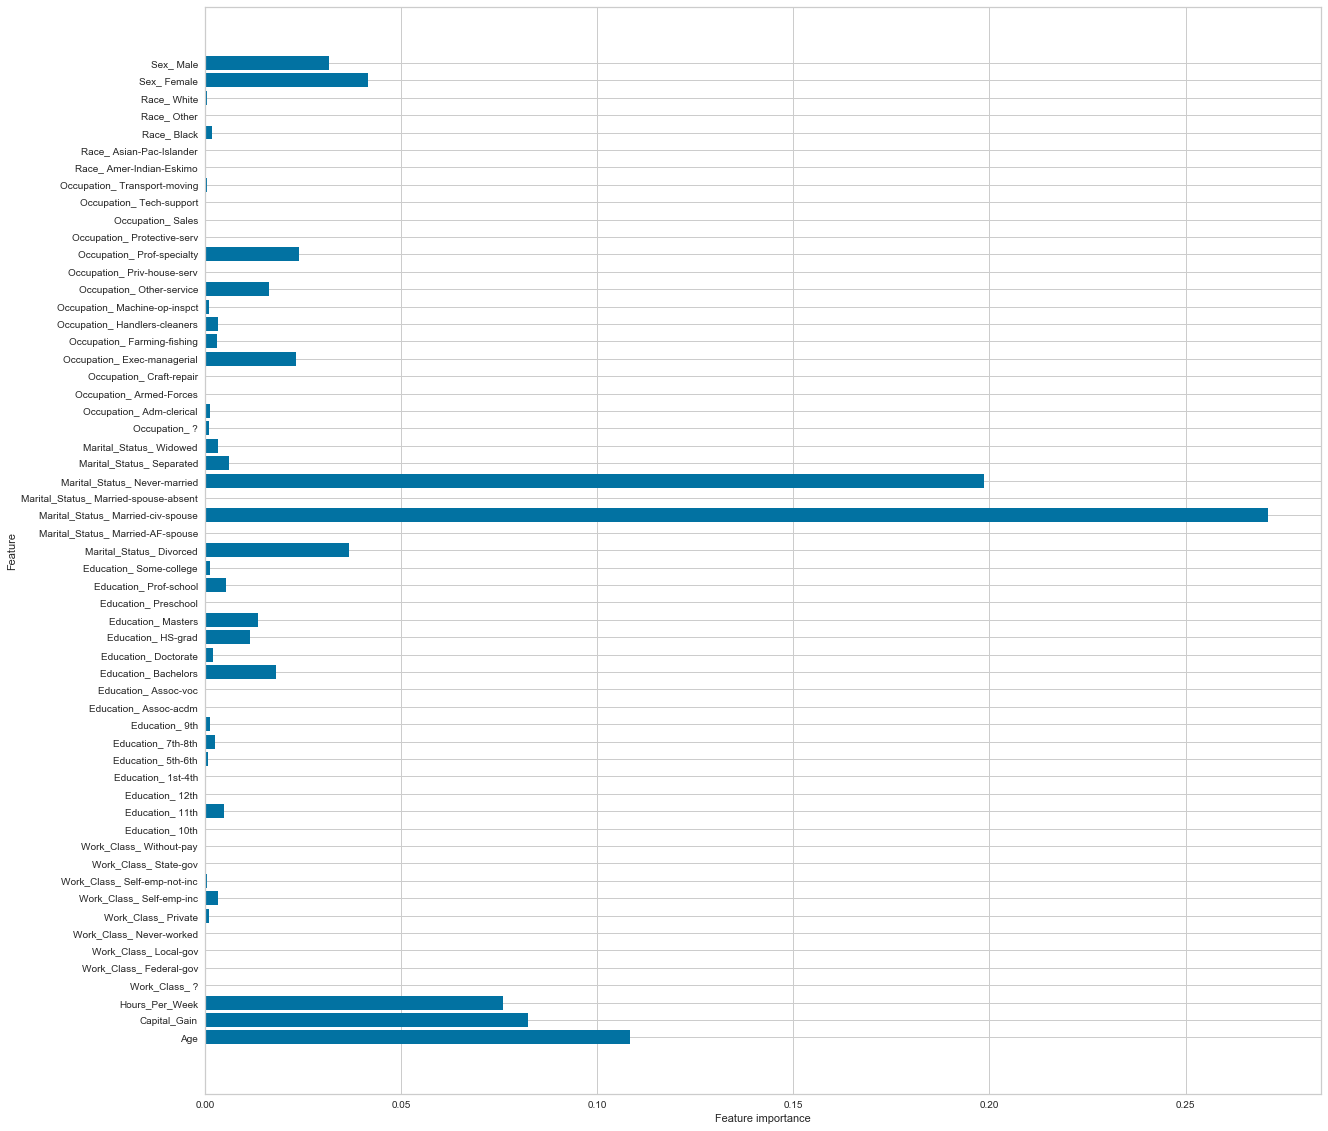

In [76]:
#feature importance
plot_feature_importances(forest)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning:

From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.



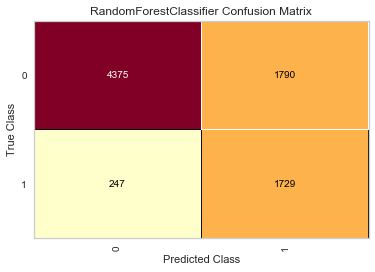

In [77]:
cm = ConfusionMatrix(forest)
cm.fit(x_resampled, y_resampled)
cm.score(data_test, target_test)
cm.show()

### Modeling using XG-Boost

In [99]:
# 
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [104]:
from xgboost import XGBClassifier

In [ ]:
# From above:
x= dummies_normalized[features]
y= dummies_normalized[target]

In [100]:

# data_train, data_test, target_train, target_test = train_test_split(x, y, 
#                                                                     test_size = 0.25, random_state=123)
# forest = RandomForestClassifier(n_estimators=100, max_depth= 5)

# forest.fit(data_train, target_train)

# predictions
# for_1 = forest.predict(data_test)
# for_1

# Training Accuracy
# forest.score(data_train, target_train)

# Test Accuracy
# forest.score(data_test, target_test)

#feature importance
# plot_feature_importances(forest)

In [101]:
data_train, data_test, target_train, target_test = train_test_split(x, y, test_size = 0.25, random_state=123)

In [105]:
#Creating an instance of the classifier:
clf = XGBClassifier()

In [106]:
# fit data to classifier:

clf.fit(data_train, target_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [108]:
# Predict on training and test data sets
training_preds = clf.predict(data_train)
test_preds = clf.predict(data_test)

In [109]:
# Accuracy of training and test sets
training_accuracy = accuracy_score(target_train, training_preds)
test_accuracy = accuracy_score(target_test, test_preds)

In [110]:
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 85.92%
Validation accuracy: 85.59%


To improve accuracy, I use the Grid Search to select features that best optimize the model.

In [ ]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(data_train, target_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(data_train)
test_preds = grid_clf.predict(data_test)
training_accuracy = accuracy_score(data_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
